## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Descriptive Statistics
28/06/2022

After this encounter you 
- will be acquainted with the fundamental concepts of descriptive stats and
- will have learned about selected methods to do descriptive analyses

## Statistics

Statistics is a set of methods and measures that deal with collecting, cleaning and analyzing a dataset and making quantitative statements about the population.

## Population

A population is a group of "all individuals, objects, or measurements whose properties are being studied" - https://openstax.org/books/introductory-statistics/pages/1-key-terms

## Sample

A sample is a subset of the population. Preferrably it is a random subset.

## Variable

"A characteristic of interest for each person or object in a population" - https://openstax.org/books/introductory-statistics/pages/1-key-terms

## Descriptive Statistics

- A set of methods and measures to describe a dataset.

- There is no uncertainty in descriptive statistics! It is not based on any theory of probability.

### Categorical, Ordinal and Metric Variables

#### Categorical Variables

The values of categorical variables (also called nominal variables) do not have a natural ordering.

#### Ordinal Variables

The values of ordinal variables have a natural ordering. However, the difference between the values is not measurable.

#### Metric Variables

The values of metric variables have a natural ordering and the distance between two values is measurable.

### Discrete vs. Continuous Variables

#### Discrete Variables

The values of a discrete variable are countable. They can be finite or infinite.

#### Continuous Variables

The values of a continuous variable are uncountable.

In [1]:
#! pip install scipy

In [2]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(800, 12)

In [5]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
df.Generation.unique()

array([1, 2, 3, 4, 5, 6])

#### Type of variables

Name: Categorical

Type 1: Categorical

Type 2: Categorical

Total: Metric

HP: 

Attack:

Defense:

Sp. Atk:

Sp. Def:

Speed: Metric

Generation: Ordinal

Legendary: Categorical

### Measures of Central Tendency/Location

Measures of central tendency are concerned with the question what a typical value of the variable is.

#### Mean

- Arithmetic mean: 
$\frac{\sum_{i=1}^n x_i}{n}$


- Geometric mean
$\sqrt[n]{\prod_{i=1}^n x_i}$


- Weighted arithmetic mean
$\frac{w_1*x_1 + w_2*x_2 + ... + w_n*x_n}{n}$

Where $w_i$ is the weight assigned to the $i_{th}$ observation of x.

**Why do we concern ourselves with different concepts of the mean?**

#### Median

The value that divides the sample into two groups of equal size. The probability of observing a value larger than the median and the probability of observing a value smaller than the median in the sample are 50% each.

#### Mode

The Mode of a variable is the value that occurs most often in the dataset.

### Measures of Dispersion (or Variability)

Measures of dispersion are concerned with the question how far the values of the variable diverge from the measures of central tendency.

#### Median Absolute Deviation (MAD)

median($|x_i - \bar{x}|$)

#### Variance

$\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}$

#### Standard Deviation

$\sqrt{Variance}$

#### Quantile

A generalization of the concept of the median. The q-Quantile of the variable are those values that divide the sample into q groups of equal size. One commonly used Quantile is the 4-Quantile or Quartile, which divides the sample into 4 groups of equal size.

Other commonly used Quantiles are Quintiles (5-Quantiles) and Percentiles (100-Quantiles).

#### Minimum

#### Maximum

#### Range

$Maximum - Minimum$

#### Inter-Quartil-Range (IQR)

$Q_{0.75} - Q_{0.25}$

#### Boxplot

A visual representation of the variability.

### Measures of Symmetry and Curvature

#### Skewness

$\frac{1}{n}*\frac{\sum_{i=1}^n (x_i - \overline{x})^3}{Variance^{3/2}}$

#### Kurtosis

$\frac{1}{n}*\frac{\sum_{i=1}^n (x_i - \overline{x})^4}{Variance^2}$

In [7]:
# Measures of central tendency

## arithmetic mean
mean = df.mean()
mean

Total         435.10250
HP             69.25875
Attack         79.00125
Defense        73.84250
Sp. Atk        72.82000
Sp. Def        71.90250
Speed          68.27750
Generation      3.32375
Legendary       0.08125
dtype: float64

In [8]:
## median
median = df.median()
median

Total         450.0
HP             65.0
Attack         75.0
Defense        70.0
Sp. Atk        65.0
Sp. Def        70.0
Speed          65.0
Generation      3.0
Legendary       0.0
dtype: float64

In [9]:
## mode
df.mode(numeric_only=True).iloc[0]

Total           600
HP               60
Attack          100
Defense          70
Sp. Atk          60
Sp. Def          80
Speed            50
Generation        1
Legendary     False
Name: 0, dtype: object

In [10]:
# Measures of variability

## MAD
stats.median_absolute_deviation(df['Speed'])

31.1346

In [11]:
## Variance
df['Speed'].var()

844.5111326658338

In [12]:
## Standard Deviation
df['Speed'].std()

29.06047371716149

In [13]:
np.sqrt(df['Speed'].var())

29.06047371716149

In [14]:
## Range
df['Speed'].max() - df['Speed'].min()

175

In [15]:
## IQR
df['Speed'].quantile(0.75) - df['Speed'].quantile(0.25)

45.0

In [16]:
stats.iqr(df['Speed'], rng=(25, 75))

45.0

<AxesSubplot:>

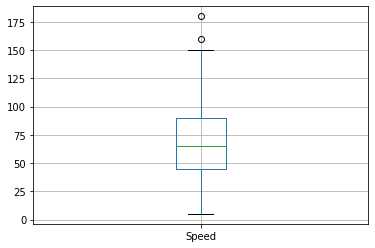

In [17]:
## Boxplot
df.boxplot('Speed')

In [18]:
# Measure of Symmetry

## Skewness

stats.skew(df['Speed'])
df.Speed.skew()

0.35793329506082994

In [19]:
# Measure of Curvature

## Kurtosis

stats.kurtosis(df['Speed'])

-0.24245216406408776

### Empirical distributions - Probability Density/Mass Function

The probability density function, for continuous variables, and the probability mass function, for discrete variables provide a relative likelihood that the value of the variable would equal that of any given datapoint.

#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`


#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

In [20]:
df.Legendary.value_counts(normalize=True)

False    0.91875
True     0.08125
Name: Legendary, dtype: float64

#### Look at histograms

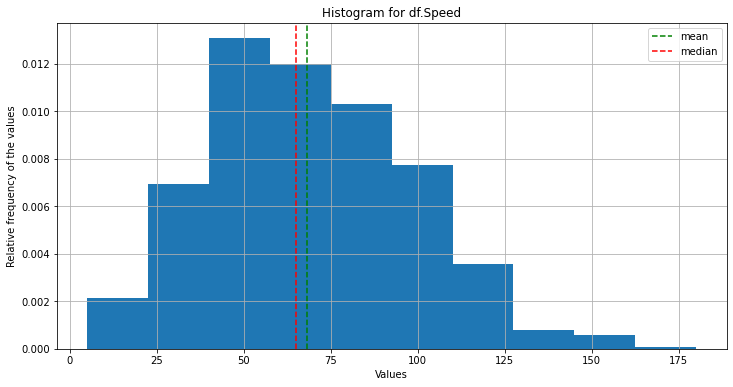

In [21]:
df.Speed.hist(figsize=(12,6), density=True, bins=10)
plt.title('Histogram for df.Speed')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.axvline(df.Speed.mean(), c='g', linestyle='--', label='mean')
plt.axvline(df.Speed.median(), c='r', linestyle='--', label='median')
plt.legend()
plt.show()

In [22]:
# Crosstab
pd.crosstab(df.Generation, df.Speed)

Speed,5,10,15,20,22,23,24,25,28,29,...,126,127,128,130,135,140,145,150,160,180
Generation,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,2,0,0,0,3,0,0,...,0,0,0,5,0,2,1,2,0,0
2,1,0,4,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,2,5,0,2,0,4,1,0,...,0,0,0,0,1,0,1,2,1,1
4,1,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,1,2,5,1,0,1,2,0,1,...,0,0,1,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,3,2,...,1,0,0,0,0,0,0,0,0,0


### Correlations

In [23]:
correlations = df.corr()

In [24]:
import seaborn as sns

<AxesSubplot:>

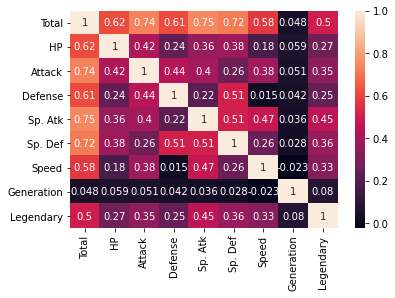

In [25]:
sns.heatmap(correlations, annot=True)